In [1]:
from keras.datasets import mnist

In [2]:
from keras import layers,models
from keras.utils import to_categorical

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 266s 23us/step


In [4]:
model = models.Sequential()

In [6]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_images = train_images.reshape(60000,28*28)/255

In [10]:
test_images = test_images.reshape(10000,28*28)/255

In [11]:
train_labels = to_categorical(train_labels)

In [12]:
test_labels = to_categorical(test_labels)

In [23]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=128,validation_data=
                   (test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0077 - acc: 0.9981 - val_loss: 0.0743 - val_acc: 0.9822
Epoch 2/5
60000/60000 [==============================] - 5s 92us/step - loss: 0.0063 - acc: 0.9983 - val_loss: 0.0780 - val_acc: 0.9819
Epoch 3/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.0048 - acc: 0.9988 - val_loss: 0.0750 - val_acc: 0.9828
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0739 - val_acc: 0.9821
Epoch 5/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.0810 - val_acc: 0.9825


In [24]:
model.evaluate(test_images,test_labels,)

10000/10000 [==============================] - 1s 54us/step


[0.08101544997822721, 0.9825]

In [25]:
history_dict = history.history

In [26]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'loss')

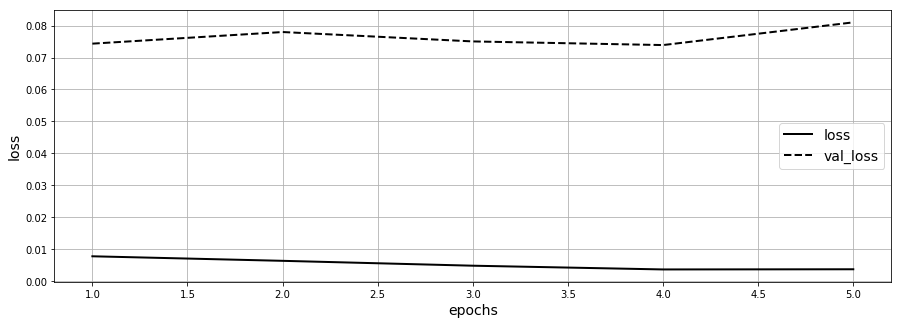

In [36]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(range(1,len(history_dict['loss'])+1),history_dict['loss'],lw=2,ls='-',c='k',label
          ='loss')
ax.plot(range(1,len(history_dict['loss'])+1),history_dict['val_loss'],lw=2,ls='--',c='k',label
          ='val_loss')
plt.legend(fontsize=14)
plt.grid()
plt.xlabel('epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
